In [28]:
# Importing the necessory libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

# ignoring warnings 
import warnings
warnings.filterwarnings(action="ignore")

# confusion matrix 
from sklearn.metrics import confusion_matrix

### LOADING THE DATASET

In [29]:
# Loading the dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [30]:
# shape of the datsets
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
#type of array 
type(X_train)

numpy.ndarray

### VISUALISATION

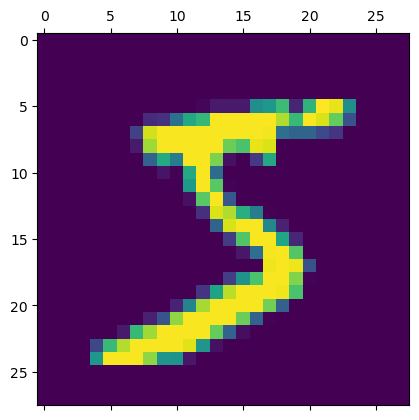

In [33]:
plt.matshow(X_train[0])

In [34]:
y_train[0]

5

### SCALING

In [35]:
X_train = X_train/255
X_test = X_test/255

### RESHAPING

In [36]:
X_train = X_train.reshape(len(X_train),28*28)
X_test = X_test.reshape(len(X_test),28*28)

In [37]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

### SIMPLE NEURAL NETWORK

In [38]:
# Creating a simple neural netwqork
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

### COMPLIING THE MODEL

In [39]:
# compling the model 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

### FITTING THE MODEL

In [40]:
history = model.fit(X_train,y_train,epochs=5,validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4893 - accuracy: 0.8724 - val_loss: 0.2727 - val_accuracy: 0.9252
Epoch 2/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3142 - accuracy: 0.9129 - val_loss: 0.2476 - val_accuracy: 0.9302
Epoch 3/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2918 - accuracy: 0.9183 - val_loss: 0.2349 - val_accuracy: 0.9368
Epoch 4/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2805 - accuracy: 0.9221 - val_loss: 0.2296 - val_accuracy: 0.9387
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9234 - val_loss: 0.2275 - val_accuracy: 0.9375


### ACCURACY VISUALISATION

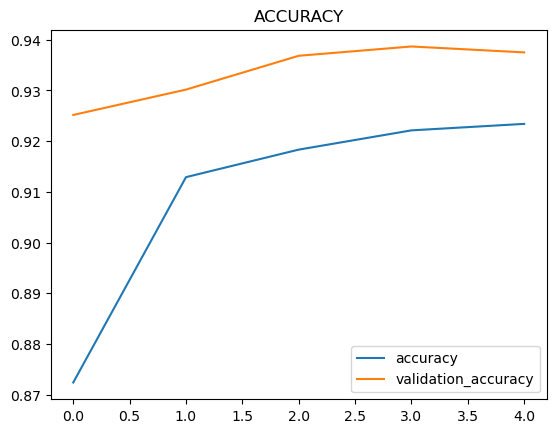

In [41]:
plt.title("ACCURACY")
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="validation_accuracy")
plt.legend()
plt.show()

### LOSS VISUALISATION

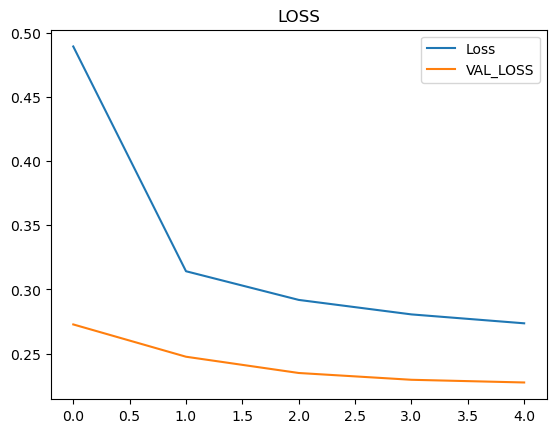

In [42]:
plt.title("LOSS")
plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="VAL_LOSS")
plt.legend()
plt.show()

* Got almost 92% accuracy.Now we will improve the accuracy by changing the hyper partameters 

### NEURAL NETWORK WITH HIDDENLAYER

In [43]:
# Neural network with 100 hiddenlayer 
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

In [44]:
# Compiling the model 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [45]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2887 - accuracy: 0.9189 - val_loss: 0.1375 - val_accuracy: 0.9615
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1324 - accuracy: 0.9612 - val_loss: 0.1004 - val_accuracy: 0.9693
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0932 - accuracy: 0.9724 - val_loss: 0.0821 - val_accuracy: 0.9760
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0719 - accuracy: 0.9786 - val_loss: 0.0847 - val_accuracy: 0.9752
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0560 - accuracy: 0.9830 - val_loss: 0.0802 - val_accuracy: 0.9763
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0722 - val_accuracy: 0.9785
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0823 - val_accuracy:

### VISULISATION OF ACCURACY AND LOSS

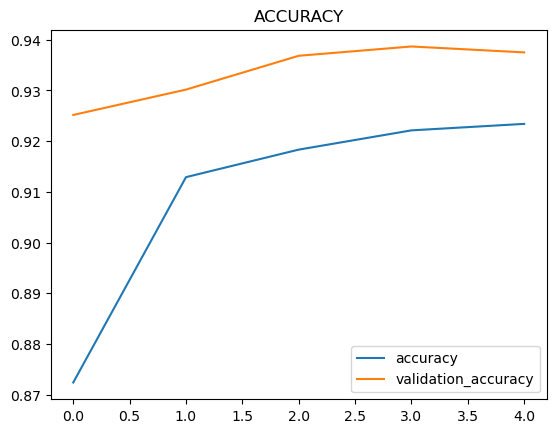

In [46]:
plt.title("ACCURACY")
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="validation_accuracy")
plt.legend()
plt.show()

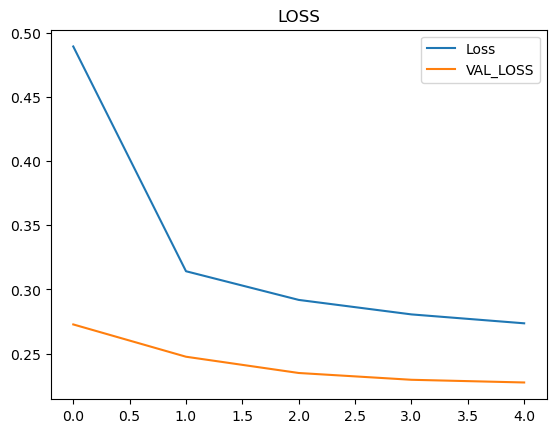

In [47]:
plt.title("LOSS")
plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="VAL_LOSS")
plt.legend()
plt.show()

### EVALUATION OF THE MODEL

In [48]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9763


[0.08518999814987183, 0.9763000011444092]

### PREDICTION

In [49]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [50]:
np.argmax(y_pred[0])

7

In [51]:
y_test[0]

7

* So, the actual label and the predicted label is same lets make a confusion matrix for the visualisation 

### CONFUSION MATRIX

In [52]:
y_pred_label = [np.argmax(x) for x in y_pred]

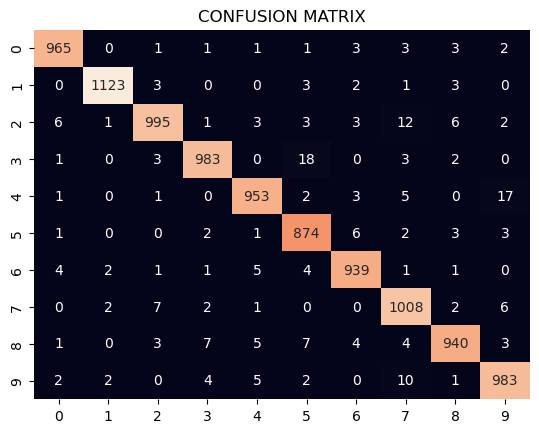

In [53]:
plt.title("CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_test,y_pred_label),annot=True,cbar=False,fmt="0.0f")
plt.show()